In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# read csv for training data set
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [39]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_train.shape

(891, 12)

In [22]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print(f'% of women who survived: {rate_women*100}')

% of women who survived: 74.20382165605095


In [19]:
men = df_train.loc[df_train.Sex=='male']["Survived"]
rate_men = sum(men)/len(men)

print(f'The percentage of men who survived was {rate_men*100}%')

The percentage of men who survived was 18.890814558058924%


In [25]:
from sklearn.ensemble import RandomForestClassifier

y = df_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")



Your submission was successfully saved!


In [55]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=50)
logreg_cv.fit(X, y)
logreg_cv.best_score_
# df_test
# accuracy_score(ytest,yhat)

0.8003921568627451

In [45]:
output.to_csv('submission.csv', index=False)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# Define the features and target
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
y = df_train["Survived"]

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model for predictions
X_test = pd.get_dummies(df_test[features])
predictions = best_model.predict(X_test)


In [59]:
# Save the predictions to a CSV file
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission2.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [58]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# Define the features and target
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
y = df_train["Survived"]

# Set up the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Create the SVM classifier
svm = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model for predictions
X_test = pd.get_dummies(df_test[features])
predictions = best_model.predict(X_test)

# Save the predictions to a CSV file
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [61]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


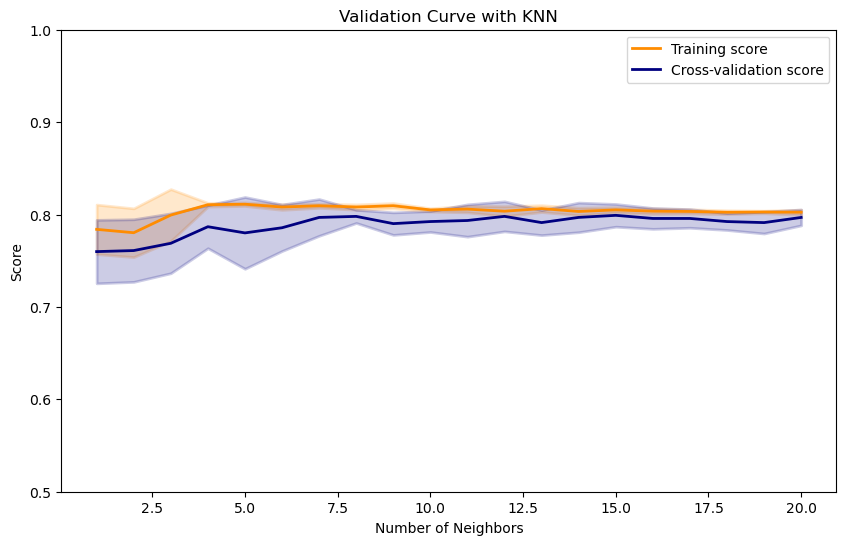

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

y = df_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])

# Define the KNN model
model = KNeighborsClassifier(weights='uniform')

# Define a range of values for neighbors (e.g., 1 to 20)
param_range = np.arange(1, 21)

# Calculate training and validation scores using validation_curve
train_scores, test_scores = validation_curve(
    model, X, y, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.ylim(0.5, 1.0)
lw = 2

plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

In [65]:
from sklearn.neighbors import KNeighborsClassifier

y = df_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

# Define the KNN model with 9 neighbors
model = KNeighborsClassifier(n_neighbors=9, weights='uniform')
model.fit(X, y)

# Make predictions using the model with 9 neighbors
predictions = model.predict(X_test)

# Save predictions to a CSV file
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [66]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
